# **Homework 4**

Due Friday, May 19, 2023 at 7:59am


# Problem 1 (50 points)

Bergman Petrol is preparing to ship gasoline to gas stations for sale to customers.  DP is known to sell gas with an \emph{octane rating} of at least 87 and a \emph{viscosity index} of at least 31.5.  These are two measures which give customers an indication of how good the gas they are purchasing is, and so they do not want to sell gas with less than this quality in either measure.

In order to create the gas that they sell, DP blends three crude gasoline stock products.  Each of the three blends has a particular octane rating and viscosity index.  However, due to confidentiality reasons, they are unwilling to share the exact octane rating and viscosity index of each of their products.  

The demand they are looking to satisfy is exactly 3000 gallons per day.  The price of each gallon of the first, second, and third crude stock is \$1.10, \$1.40, and \$1.60, respectively.   DP has at their disposal 2000 gallons of each crude stock per day, and so DP solves the optimization problem of creating 3000 gallons of blended gasoline from the crude stocks, while not exceeding 2000 gallons of any individual blend and having at least an octane rating of 87 and viscosity index of 31.5.   The octane rating and viscosity index of the blend is calculated by taking the average per gallon octane rating and viscosity index.

Although DP is not willing to share the proprietary information with you, they can show you the following sensitivity report, which doesn't not sacrifice any sensitive information.

Cell \texttt{C18} is where the objective was set, cells \texttt{H7,H8,H9} are where the decisions of the number of gallons of each crude stock were placed, cell \texttt{D13} contains the LHS of the demand constraint, cell \texttt{D14} contains the LHS of the octane minimum constraint, and cell \texttt{D15} contains the LHS of the viscosity index minimum constraint. 

Using this sensitivity report, DP is hoping that you can still assist them!  DP has the following questions.  For each question, indicate whether or not you can answer the question.  If you can, provide the answer.  If you cannot, explain why you cannot use the sensitivity report to answer the question. 




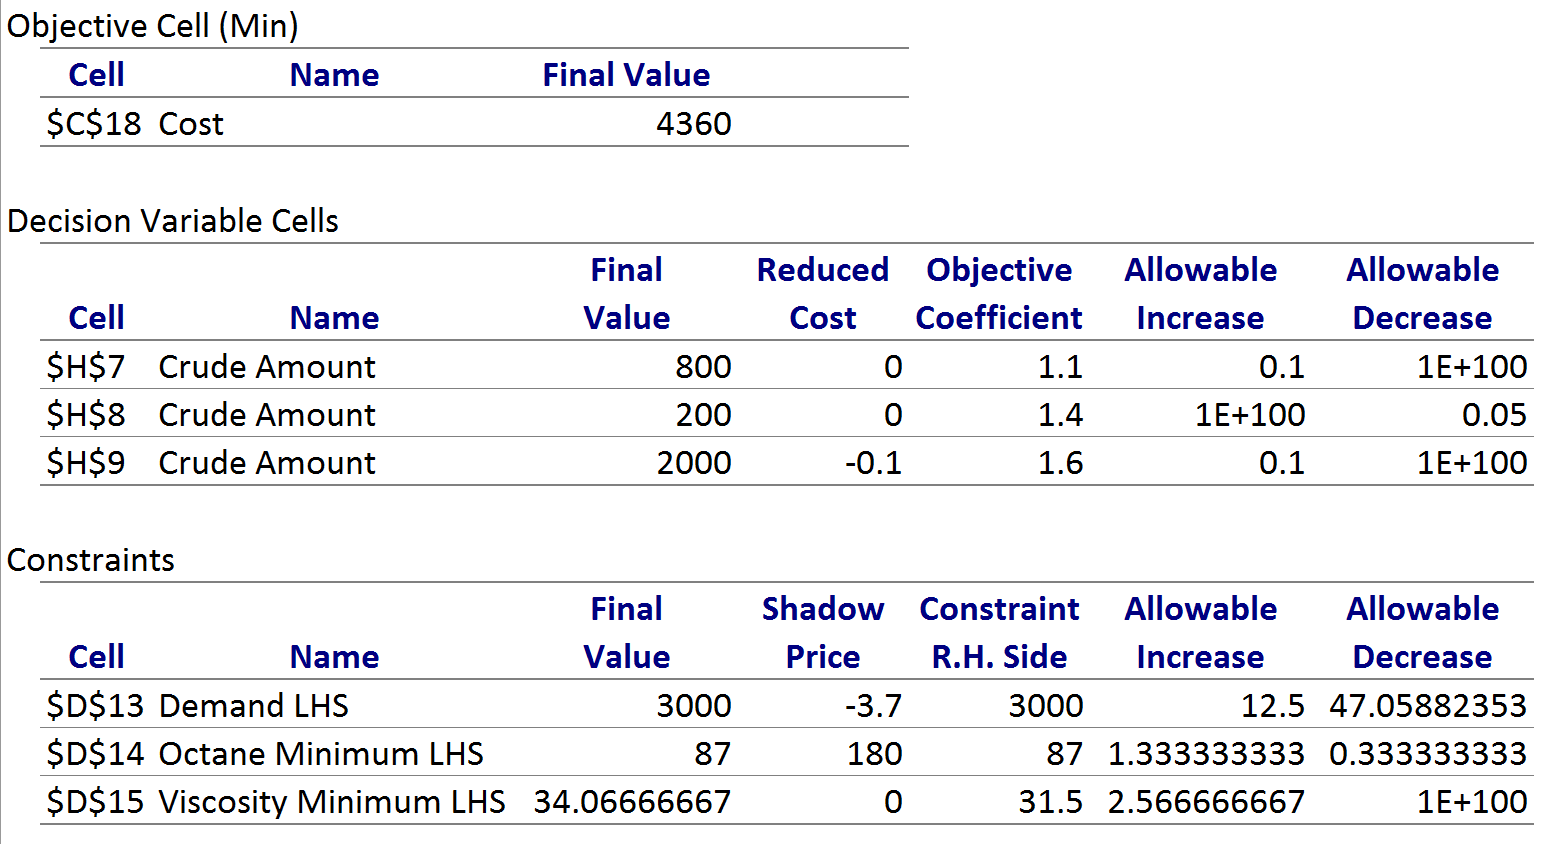

## Problem 1a
How many gallons of each crude stock are in the optimal solution?

---



According to the Sensitivity report, optimal solution for Crude Stock are: 800, 200,2000.

## Problem 1b
What is the cost at the optimal solution?

---



4360 is the optimal solution.

## Problem 1c
The cost for crude stock 1 is a bit uncertain. Suppose that the cost reduces to $0.90 per gallon. What would be the optimal solution? What would be the optimal cost?



In [16]:
4360 + (0.9-1.1)*800

4200.0

## Problem 1d
What if the cost increases to $1.30? What would be the optimal solution? What would be the optimal cost?

---




The optimal solution is undetermined because the cost would increase by 0.2 but the allowable change is limited to 0.1.

## Problem 1e
One of the DP executives believes that their customers will be happy if they can publish a higher viscosity index of their gas blend. She thinks that this will lead to more demand for DP gasoline in the future. She wants to know how much more it will cost to raise the published viscosity index to 34.5. What would be the optimal solution? What would be the optimal cost?


---



Here the change in the viscosity index makes it to change by 3 but the 
allowable change is 2.566. So, the answer is undetermined.

## Problem 1f
A different DP executives has an alternative suggestion. She wants to know if DP can safely raise their published viscosity index. What is the largest value that you can safely tell DP that they can raise their published viscosity index, without affecting the cost that DP is paying to satisfy the 3000 gallon demand?

---



The largest value will be 34.0666667 for 3000-gallon demand.

## Problem 1g
DP just found out that the demand is increasing to 3,010 gallons. Although this is only a moderate increase, DP still wants to know how much this will affect their operations. What is the optimal solution now? What is the optimal cost?

---



By increasing the demand from 3000 to 3010 is allowable and it is the allowable increase range. The optimal solution is undetermined and the cost will be 
4360+ 10*(-3.7) = 4323.

# Problem 2 (50 points)

Solve the Advertising problem in Pyomo.

https://colab.research.google.com/drive/1X2gri75Dca-MYrhOJMqsf5gF7zL0XdIl?usp=share_link

## Advertising

In [17]:
import sys
import os
import numpy as np
import pandas as pd
 
if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'
  
from pyomo.environ import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Getting files...
Done
---------------------------------------------------
IDAES Extensions Build Versions
Solvers:  vno version file found
Library:  vno version file found


In [18]:
Advertising_cost = 40000
Sell_price = 40
Cost_price = 25

seasonal_factor = [0.9,1.1,0.8,1.2]
Sales_Cost =[8000,8000,9000,9000]

In [19]:

model = ConcreteModel()

In [20]:
model.pprint()

0 Declarations: 


In [21]:
model.adq1 = Var(domain=NonNegativeReals, bounds=(0, None), initialize=0)
model.adq2 = Var(domain=NonNegativeReals, bounds=(0, None), initialize=0)
model.adq3 = Var(domain=NonNegativeReals, bounds=(0, None), initialize=0)
model.adq4 = Var(domain=NonNegativeReals, bounds=(0, None), initialize=0)

In [22]:

unit_sales= int
unit_sales = 35 * 0.9 * ((3000 + model.adq1) ** 0.5) + 35 * 1.1 * ((3000 + model.adq2) ** 0.5) + 35 * 0.8 * ((3000 + model.adq3) ** 0.5) + 35 * 1.2 * ((3000 + model.adq4) ** 0.5)
Sales_Cost = 34000

In [23]:
Objective_expr = unit_sales* Sell_price -( Sales_Cost+ unit_sales*Cost_price + (0.15*40*unit_sales)+Advertising_cost)

In [24]:
model.profit = Objective(
    expr = Objective_expr,
    sense = maximize
)

In [25]:
model.my_constraint_list = ConstraintList()

model.my_constraint_list.add( model.adq1+model.adq2+model.adq3+model.adq4 == 40000 )

model.pprint()

1 Set Declarations
    my_constraint_list_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    1 :    {1,}

4 Var Declarations
    adq1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :     0 :  None : False : False : NonNegativeReals
    adq2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :     0 :  None : False : False : NonNegativeReals
    adq3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :     0 :  None : False : False : NonNegativeReals
    adq4 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :     0 :  None : False : False : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : m

In [26]:
SolverFactory('couenne').solve(model, tee=True).write()

Couenne 0.5.8 -- an Open-Source solver for Mixed Integer Nonlinear Optimization
Mailing list: couenne@list.coin-or.org
Instructions: http://www.coin-or.org/Couenne
couenne: 
ANALYSIS TEST: Couenne: new cutoff value -5.2692877888e+04 (0.013066 seconds)
NLP0012I 
              Num      Status      Obj             It       time                 Location
NLP0014I             1         OPT -71446.794        9 0.003169
Couenne: new cutoff value -7.1446794396e+04 (0.016235 seconds)
Loaded instance "/tmp/tmpx_h7v51w.pyomo.nl"
Constraints:            1
Variables:              4 (0 integer)
Auxiliaries:           10 (0 integer)

Coin0506I Presolve 26 (-5) rows, 9 (-5) columns and 57 (-10) elements
Clp0006I 0  Obj -71446.784 Primal inf 12479.357 (2) Dual inf 21.14012 (1)
Clp0006I 15  Obj -73574.141
Clp0000I Optimal - objective value -73574.141
Clp0032I Optimal objective -73574.1413 - 15 iterations time 0.002, Presolve 0.00
Clp0000I Optimal - objective value -73574.141
Cbc0012I Integer solution of 

In [36]:
print("Budget_q1: ", model.adq1())
print("Budget_q2: ", model.adq2())
print("Budget_q3: ", model.adq3())
print("Budget_q4: ", model.adq4())


Budget_q1:  7273.250792230151
Budget_q2:  12346.757873337478
Budget_q3:  5116.6675326807745
Budget_q4:  15263.323801751598


In [33]:
print('Total Budget:', model.adq1()+model.adq2()+model.adq3()+model.adq4())

Total Budget: 40000.0


In [34]:
print("Profit: ", model.profit())

Profit:  71446.79438433726
